In [1]:
# run this cell if this notebook is in directory notebooks
%cd ..

/tf/fiit_nn_project


In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
from src.data.load_data import load_dataset
from src.data.processing import resize_images, \
    calculate_bboxes_middle_points, encode_anns_to_yolo, \
    decode_yolo_to_anns, input_fn
from src.utils import plot_img_with_bboxes, is_point_in_bbox
from src.models.models import base_model
from train import train

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (10, 10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
dev_x, dev_y = load_dataset('data/datasets/dev-100-person.npz')
print(len(dev_x), len(dev_y))

100 100


# Sanity check on 1 image

In [5]:
dev_x_new = resize_images(dev_x, (256, 256))

In [6]:
dev_y_new = calculate_bboxes_middle_points(dev_y)

In [7]:
img_size = (256, 256)
grid_size = (16, 16)
epochs = 100

yolo_anns = np.array([
    encode_anns_to_yolo(y, img_size, grid_size)
    for y in dev_y_new
])
yolo_anns.shape

(100, 16, 16, 5)

In [8]:
dev_dataset = input_fn(dev_x_new[:1], yolo_anns[:1], is_training=True, batch_size=16)
print(dev_dataset)

<PrefetchDataset shapes: ((None, 256, 256, 3), (None, 16, 16, 5)), types: (tf.float32, tf.float32)>


In [9]:
training_params = {
    "batch_size": 1,
    "epochs": 100
}

model_params = {
    "learning_rate": 0.001,
    "l_coord": 5.0,
    "l_noobj": 0.5
}

model, history = train(
    (dev_x_new[:1], dev_y_new[:1]),
    training_params=training_params,
    model_params=model_params,
    model_name='base_model',
    grid_size=grid_size,
    log_dir="logs/base_model/sanity_check_1"
)

Calculate bboxes middle points
Creeate yolo vector
Create dataset
Model: "base_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 256, 256, 16)      64        
_________________________________________________________________
conv_2 (Conv2D)              (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling_1 (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 128, 128, 16)      4624      
_________________________________________________________________
conv_4 (Conv2D)              (None, 128, 128, 32)      4640      
________________________________________________________

Epoch 67/100
1/1 [==============================] - 3s 3s/step - loss: 0.0112 - F1Score: 1.0000
Epoch 68/100
1/1 [==============================] - 3s 3s/step - loss: 0.0105 - F1Score: 1.0000
Epoch 69/100
1/1 [==============================] - 3s 3s/step - loss: 0.0099 - F1Score: 1.0000
Epoch 70/100
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - F1Score: 1.0000
Epoch 71/100
1/1 [==============================] - 3s 3s/step - loss: 0.0089 - F1Score: 1.0000
Epoch 72/100
1/1 [==============================] - 3s 3s/step - loss: 0.0085 - F1Score: 1.0000
Epoch 73/100
1/1 [==============================] - 3s 3s/step - loss: 0.0082 - F1Score: 1.0000
Epoch 74/100
1/1 [==============================] - 3s 3s/step - loss: 0.0079 - F1Score: 1.0000
Epoch 75/100
1/1 [==============================] - 3s 3s/step - loss: 0.0077 - F1Score: 1.0000
Epoch 76/100
1/1 [==============================] - 3s 3s/step - loss: 0.0076 - F1Score: 1.0000
Epoch 77/100
1/1 [======================

In [10]:
# dev_dataset = input_fn(dev_x[:1], yolo_anns[:1], is_training=False, batch_size=1)
p = model.predict(dev_dataset, steps=1)

In [11]:
p

array([[[[0.30592096, 0.23115245, 0.19425517, 0.83868814, 0.8933222 ],
         [0.3102115 , 0.2116    , 0.15325579, 0.86427784, 0.7835227 ],
         [0.26699856, 0.44852644, 0.437603  , 0.71863395, 0.6470161 ],
         ...,
         [0.27848592, 0.35205728, 0.31719565, 0.6703999 , 0.59513915],
         [0.29106915, 0.3147064 , 0.27034384, 0.83846307, 0.64218104],
         [0.28564784, 0.277502  , 0.34429914, 0.60943294, 0.7537357 ]],

        [[0.2798842 , 0.31344217, 0.4057082 , 0.66196966, 0.7228609 ],
         [0.30394262, 0.30579048, 0.16859743, 0.81386137, 0.77491283],
         [0.3152115 , 0.17791963, 0.14207113, 0.872275  , 0.8471706 ],
         ...,
         [0.30922005, 0.19271642, 0.12438741, 0.637942  , 0.77050763],
         [0.29128456, 0.26825216, 0.3695664 , 0.7574203 , 0.80223083],
         [0.2619344 , 0.4043542 , 0.6004046 , 0.6825894 , 0.72735226]],

        [[0.30191892, 0.22509208, 0.20807016, 0.822191  , 0.72319126],
         [0.2855288 , 0.43220207, 0.2695247 ,

[[0.3112448  0.23979113 0.12504879 0.8842256  0.7888721 ]
 [0.30528206 0.19325674 0.21760735 0.7992796  0.80008084]
 [0.23920539 0.31403905 0.73783284 0.78682935 0.49261466]
 [0.31180474 0.1663869  0.15136683 0.76259315 0.73296076]
 [0.3144883  0.11911514 0.18869123 0.8648423  0.9210663 ]
 [0.288413   0.17727321 0.31137913 0.5040013  0.6309544 ]
 [0.30570185 0.16179532 0.21982932 0.7073846  0.760061  ]
 [0.31646895 0.10011014 0.15474322 0.8125944  0.73190403]
 [0.30781513 0.18576422 0.25283015 0.8317836  0.91133076]
 [0.9152792  0.78658456 0.13442367 0.02344617 0.08450264]
 [0.28745812 0.24376395 0.45580357 0.8295177  0.7986915 ]
 [0.29295534 0.27030775 0.3346155  0.7747933  0.8511224 ]
 [0.28328866 0.51963484 0.18660057 0.7039211  0.8484528 ]
 [0.29284406 0.33301044 0.22207338 0.7677355  0.7400368 ]
 [0.26947713 0.56691957 0.31026855 0.6772866  0.77439153]
 [0.2990477  0.24226606 0.3376462  0.8847499  0.8580185 ]]
[[0.27195793 0.49246576 0.31911147 0.5906245  0.83298695]
 [0.28523594 

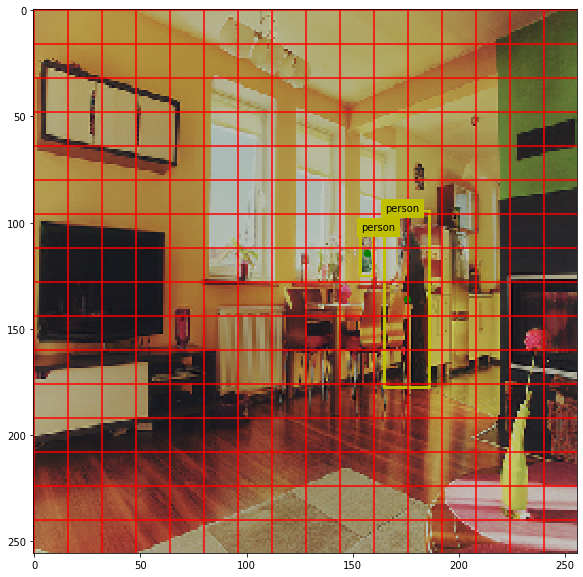

In [12]:
img_id = 0
print(p[img_id][7])
print(p[img_id][8])
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a + dev_y_new[img_id], grid=(16, 16))

# Sanity check on 100 images

In [13]:
dev_x_new = resize_images(dev_x, (256, 256))

In [14]:
dev_y_new = calculate_bboxes_middle_points(dev_y)

In [15]:
img_size = (256, 256)
grid_size = (16, 16)
epochs = 100

yolo_anns = np.array([
    encode_anns_to_yolo(y, img_size, grid_size)
    for y in dev_y_new
])
yolo_anns.shape

(100, 16, 16, 5)

In [16]:
dev_dataset = input_fn(dev_x_new[:100], yolo_anns[:100], is_training=False, batch_size=16)
print(dev_dataset)

<PrefetchDataset shapes: ((None, 256, 256, 3), (None, 16, 16, 5)), types: (tf.float32, tf.float32)>


In [17]:
training_params = {
    "batch_size": 16,
    "epochs": 100
}

model_params = {
    "learning_rate": 0.001,
    "l_coord": 5.0,
    "l_noobj": 0.5
}

model, history = train(
    (dev_x_new[:100], dev_y_new[:100]),
    training_params=training_params,
    model_params=model_params,
    model_name='base_model',
    grid_size=grid_size,
    log_dir="logs/base_model/sanity_check_100"
)

Calculate bboxes middle points
Creeate yolo vector
Create dataset
Model: "base_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 256, 256, 16)      64        
_________________________________________________________________
conv_2 (Conv2D)              (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling_1 (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 128, 128, 16)      4624      
_________________________________________________________________
conv_4 (Conv2D)              (None, 128, 128, 32)      4640      
________________________________________________________

6/6 [==============================] - 12s 2s/step - loss: 1.4855 - F1Score: 0.8516
Epoch 66/100
6/6 [==============================] - 11s 2s/step - loss: 1.5270 - F1Score: 0.8280
Epoch 67/100
6/6 [==============================] - 13s 2s/step - loss: 1.7511 - F1Score: 0.8190
Epoch 68/100
6/6 [==============================] - 15s 3s/step - loss: 1.4048 - F1Score: 0.8681
Epoch 69/100
6/6 [==============================] - 10s 2s/step - loss: 1.4157 - F1Score: 0.8407
Epoch 70/100
6/6 [==============================] - 11s 2s/step - loss: 1.3251 - F1Score: 0.8544
Epoch 71/100
6/6 [==============================] - 11s 2s/step - loss: 1.4406 - F1Score: 0.8125
Epoch 72/100
6/6 [==============================] - 12s 2s/step - loss: 1.3290 - F1Score: 0.8316
Epoch 73/100
6/6 [==============================] - 11s 2s/step - loss: 1.2688 - F1Score: 0.8656
Epoch 74/100
6/6 [==============================] - 12s 2s/step - loss: 1.3236 - F1Score: 0.8653
Epoch 75/100
6/6 [=========================

In [18]:
# dev_dataset = input_fn(dev_x[:1], yolo_anns[:1], is_training=False, batch_size=1)
p = model.predict(dev_dataset, steps=100/16)

In [19]:
p

array([[[[0.17070538, 0.45232224, 0.03215989, 0.1621272 , 0.03838059],
         [0.18651378, 0.38389215, 0.09483415, 0.1850014 , 0.07439917],
         [0.27238405, 0.48557827, 0.350204  , 0.6531521 , 0.78963745],
         ...,
         [0.2220085 , 0.33759797, 0.05242452, 0.20100227, 0.07533643],
         [0.13384292, 0.23074889, 0.08245909, 0.13396925, 0.02601531],
         [0.2783511 , 0.5258626 , 0.22159377, 0.6997822 , 0.83962226]],

        [[0.2754746 , 0.34152618, 0.48250815, 0.65891355, 0.8757217 ],
         [0.23226956, 0.13400304, 0.41233352, 0.2364535 , 0.30982023],
         [0.18590271, 0.5783273 , 0.5931023 , 0.47226056, 0.2807101 ],
         ...,
         [0.1659781 , 0.2415221 , 0.3691314 , 0.11540648, 0.20067656],
         [0.19419566, 0.05399787, 0.61142373, 0.1092369 , 0.24998549],
         [0.18541035, 0.71866745, 0.701707  , 0.49153355, 0.38236937]],

        [[0.19046757, 0.2427676 , 0.06830898, 0.1107119 , 0.1052981 ],
         [0.24442318, 0.3231117 , 0.28551602,

In [56]:
# pick random images
rand_images = np.random.randint(low=0, high=100, size=5)
rand_images

array([32, 46, 54, 51, 69])

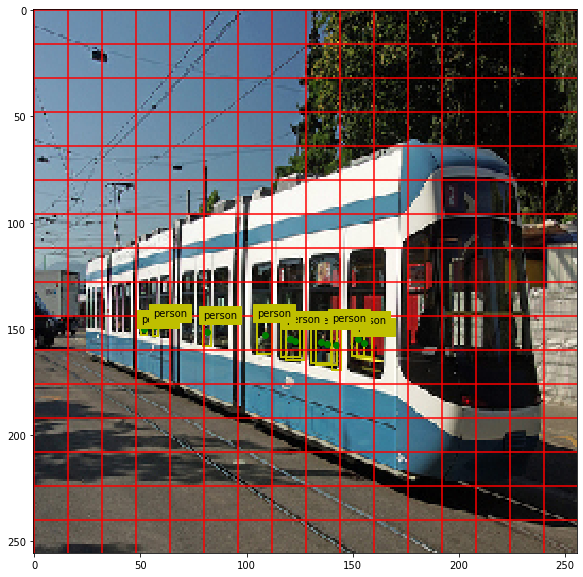

In [57]:
img_id = rand_images[0]
# print(p[img_id][7])  # uncomment if you want to see predicted confidence and bboxes
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a + dev_y_new[img_id], grid=(16, 16))

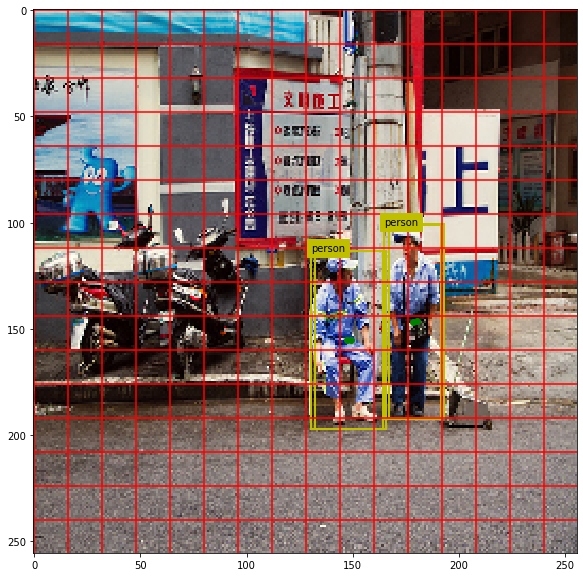

In [58]:
img_id = rand_images[1]
# print(p[img_id][7])  # uncomment if you want to see predicted confidence and bboxes
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a + dev_y_new[img_id], grid=(16, 16))

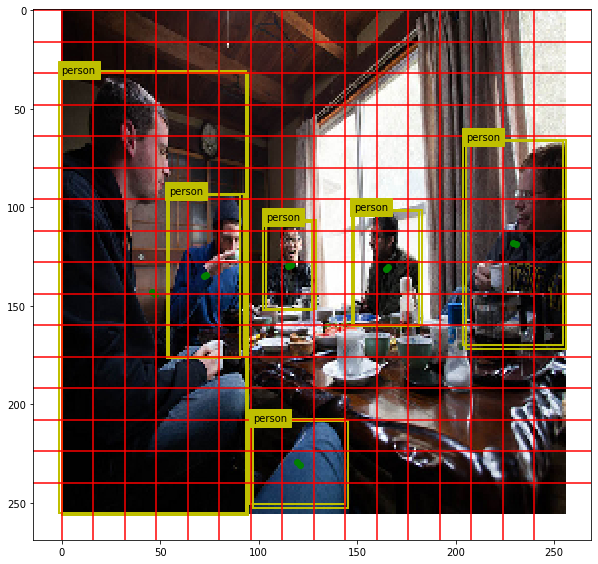

In [59]:
img_id = rand_images[2]
# print(p[img_id][7])  # uncomment if you want to see predicted confidence and bboxes
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a + dev_y_new[img_id], grid=(16, 16))

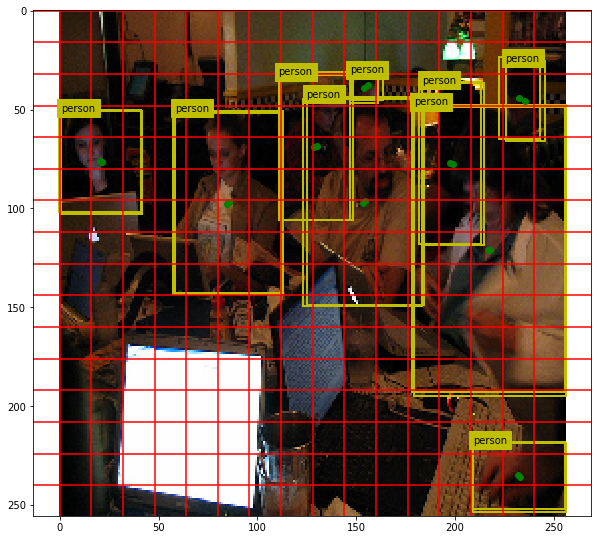

In [60]:
img_id = rand_images[3]
# print(p[img_id][7])  # uncomment if you want to see predicted confidence and bboxes
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a + dev_y_new[img_id], grid=(16, 16))

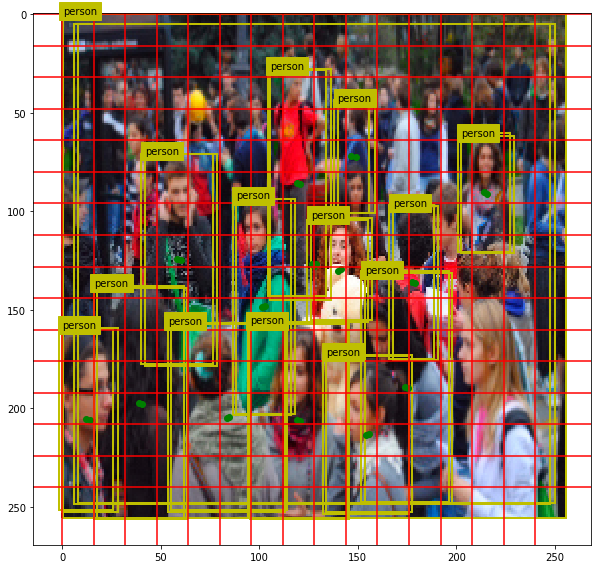

In [61]:
img_id = rand_images[4]
# print(p[img_id][7])  # uncomment if you want to see predicted confidence and bboxes
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a + dev_y_new[img_id], grid=(16, 16))